Assignment-1

FA21: CMPE-255 Sec 48 - Data Mining

Archana Shokeen (015237378)

San Jose State University

Data Sets used - https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

Data Narrative

These are open source data set provided by Kaggle. It covers the various attributes like DailyRate , EnvironmentSatisfaction, JobSatisfaction, Age, TotalWorkingYears etc.
The wrangling of data is done to avoid null values and drop the duplicate entries. The extra columns are dropped using iloc.

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
import sys 
import pandas as pd 
import matplotlib 
import numpy as np 
import scipy as sp
import IPython
from IPython import display 
import sklearn 
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
warnings.simplefilter(action='ignore')
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)


# from google.colab import files
# uploaded = files.upload()


Python version: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
pandas version: 1.1.5
matplotlib version: 3.2.2
NumPy version: 1.19.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1
-------------------------


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [12]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
HR=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
HR.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Data Cleaning

In [5]:
# no.of columns and information about its factors
print ("The shape of the  data is (row, column):"+ str(HR.shape))
print (HR.info())

The shape of the  data is (row, column):(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1

# Checking Missing data

In [7]:
print('Data columns with null values:',HR.isnull().sum(), sep = '\n')

Data columns with null values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

In [9]:
print("Gender classification:",HR.Gender.value_counts(),sep = '\n')
print("-"*40)
print("Business Travel:",HR.BusinessTravel.value_counts(),sep = '\n')
print("-"*40)
print("Departments:",HR.Department.value_counts(),sep = '\n')
print("-"*40)
print("Educational Field:",HR.EducationField.value_counts(),sep = '\n')
print("-"*40)
print("Job Roles:",HR.JobRole.value_counts(),sep = '\n')
print("-"*40)

Gender classification:
Male      882
Female    588
Name: Gender, dtype: int64
----------------------------------------
Business Travel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------------------
Departments:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------------------
Educational Field:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------------------
Job Roles:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources      

# Data Visualization

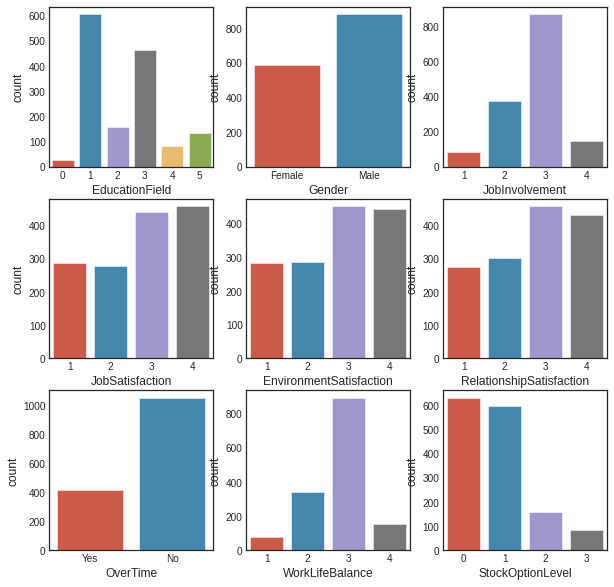

In [13]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
label = LabelEncoder()
HR['EducationField'] = label.fit_transform(HR['EducationField'])
sns.countplot(HR['EducationField'],)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(332)
sns.countplot(HR['Gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(333)
sns.countplot(HR['JobInvolvement'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(334)
sns.countplot(HR.JobSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(335)
sns.countplot(HR.EnvironmentSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(336)
sns.countplot(HR.RelationshipSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(337)
sns.countplot(HR.OverTime)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(338)
sns.countplot(HR.WorkLifeBalance)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(339)
sns.countplot(HR.StockOptionLevel)
fig = plt.gcf()
fig.set_size_inches(10,10)

# Feature Visualization

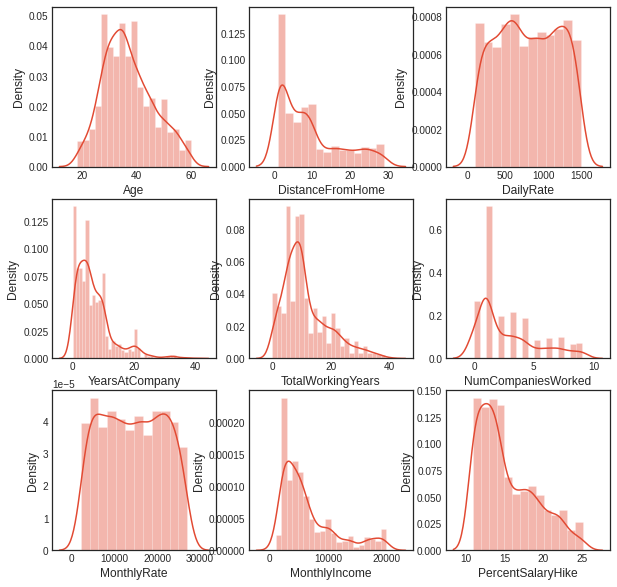

In [14]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
sns.distplot(HR['Age'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(332)
sns.distplot(HR['DistanceFromHome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(333)
sns.distplot(HR['DailyRate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(334)
sns.distplot(HR['YearsAtCompany'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(335)
sns.distplot(HR['TotalWorkingYears'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(336)
sns.distplot(HR['NumCompaniesWorked'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(337)
sns.distplot(HR['MonthlyRate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(338)
sns.distplot(HR['MonthlyIncome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(339)
sns.distplot(HR['PercentSalaryHike'])
fig = plt.gcf()
fig.set_size_inches(10,10)

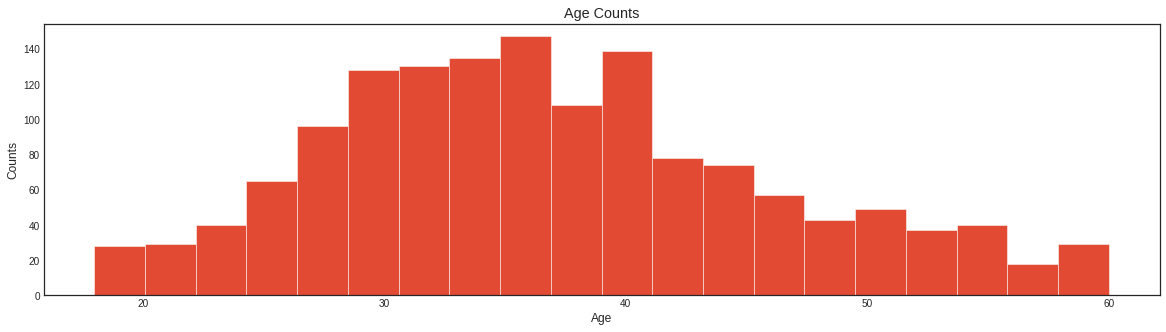

In [15]:
plt.figure(figsize=(20,5))
plt.hist(HR.Age,bins=20)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

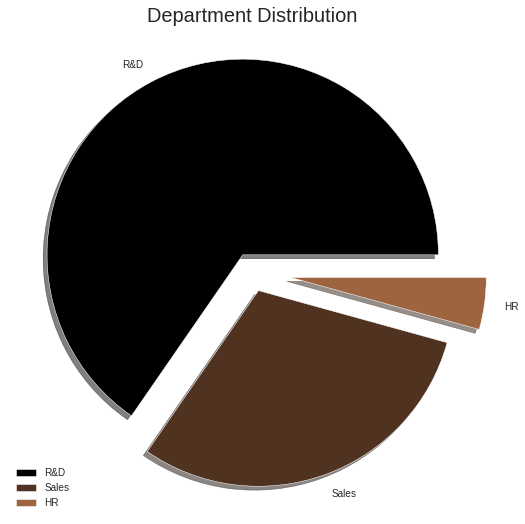

In [17]:

labels = ['R&D', 'Sales', 'HR']
sizes = HR['Department'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Department Distribution', fontsize = 20)
plt.legend()
plt.show()

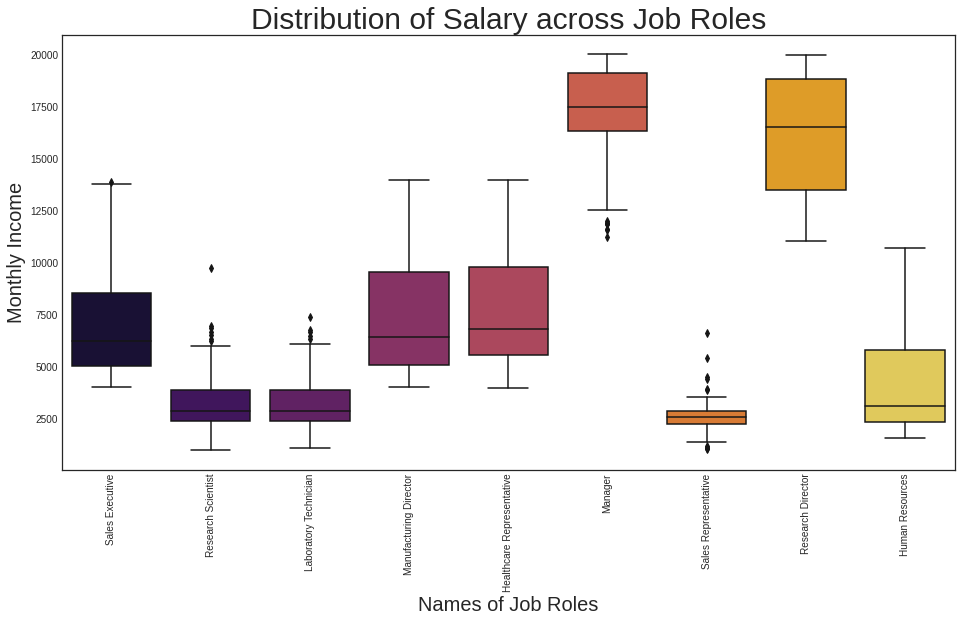

In [18]:
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = HR['JobRole'], y =HR['MonthlyIncome'], data = HR, palette = 'inferno')
ax.set_xlabel(xlabel = 'Names of Job Roles', fontsize = 20)
ax.set_ylabel(ylabel = 'Monthly Income', fontsize = 20)
ax.set_title(label = 'Distribution of Salary across Job Roles', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

<Figure size 720x360 with 0 Axes>

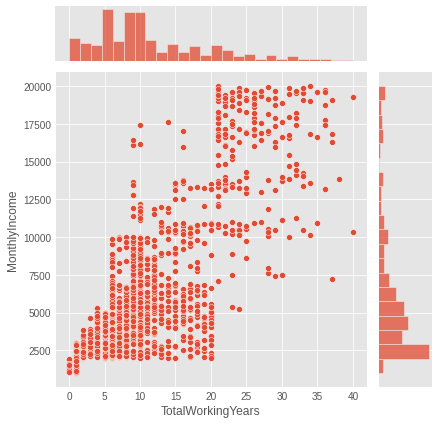

In [19]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=HR)

# HeatMap

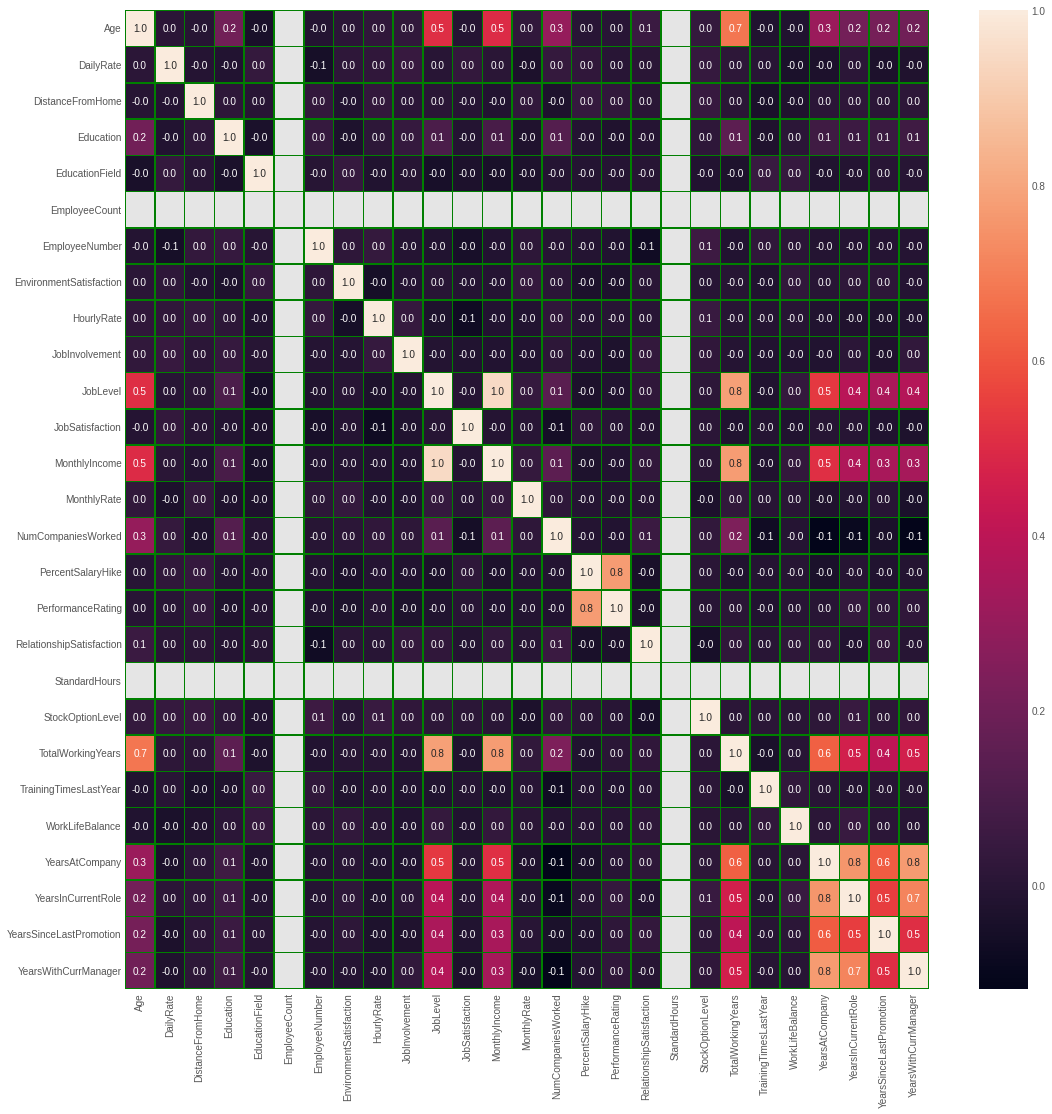

In [24]:
# Correlation between Factors- Heatmap

f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(HR.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()



In [26]:
s = (HR.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)



Categorical variables:
['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


#  Hot Encoding


In [30]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_data = HR.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(HR[col])


s = (label_data.dtypes == 'object')
print(list(s[s].index))

label_data.head()

[]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


# Model Training and Prediction

In [31]:
data_features=['Age','EnvironmentSatisfaction',
               'Gender','JobInvolvement', 'JobLevel', 'JobRole',
               'JobSatisfaction','MonthlyIncome','PerformanceRating',
               'TotalWorkingYears','YearsAtCompany','OverTime']
X=label_data[data_features]
y=label_data.Attrition

# Accuracy

In [35]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500000)
model.fit(train_X, train_y)
y_pred = model.predict(val_X)
accuracy = model.score(val_X, val_y)
print(accuracy)

0.8233695652173914


In [36]:
val_y.head()

1291    1
1153    1
720     1
763     0
976     0
Name: Attrition, dtype: int64

In [39]:
predictions = model.predict(val_X)

# Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(val_y, predictions.round())
conf_matrix

array([[296,   4],
       [ 61,   7]])

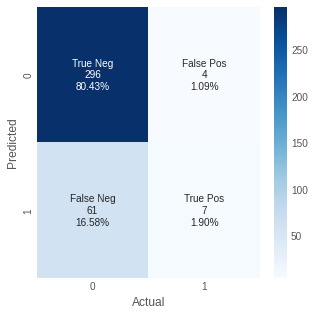

In [41]:
plt.subplots(figsize=(5,5))
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()